# Plan
1. read data, split to labels and data, reshape data for Convulotional networks
2. explore data, view all categories
3. make dense model (model_1 in preivous notebook)
4. convulotional model (model_2 current notebook)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import tensorflow.keras as keras
from keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras import models, layers


In [2]:
PATH ='data/'
print(os.listdir(PATH))

['t10k-images-idx3-ubyte', 'fashion-mnist_test.csv', 't10k-labels-idx1-ubyte', 'train-images-idx3-ubyte', 'fashion-mnist_train.csv', 'train-labels-idx1-ubyte']


In [3]:
# read images
train_file = PATH+"fashion-mnist_train.csv"
test_file  = PATH+"fashion-mnist_test.csv"

train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

In [4]:
# train data
print(train_data.shape)
train_data.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# test data
print(train_data.shape)
test_data.head()

(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Define labels and X


In [6]:
# dictionary of labels 
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

In [7]:
y_train=train_data['label'].to_numpy()
y_test=test_data['label'].to_numpy()
train_data.drop(columns=['label'], inplace=True)
test_data.drop(columns=['label'], inplace=True)

In [8]:
# make a copy as a non hot encoded label
y_test_copy=y_test.copy()
y_train_copy=y_train.copy()

In [9]:
# one hot encoding of labels
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

In [10]:
# transform the train and test data to numpy arrays (dense)
X_train=train_data.to_numpy()
X_test=test_data.to_numpy()
X_train.shape

(60000, 784)

In [11]:
# transform the train and test data to numpy image arrays (if Conv is going to be used)
X_train_image=X_train.reshape(len(train_data),28,28)
X_test_image=X_test.reshape(len(test_data),28,28)
X_train_image.shape

(60000, 28, 28)

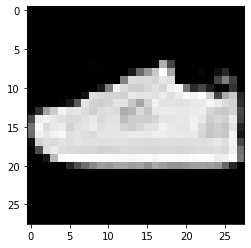

In [12]:
# look at the image
plt.imshow(X_train_image[59999],cmap='gray')

In [13]:
X_train_image.shape, X_test_image.shape

((60000, 28, 28), (10000, 28, 28))

In [14]:
#reshape to include the channel
X_train_image = X_train_image.reshape(60000, 28, 28,1)
X_test_image = X_test_image.reshape(10000, 28, 28,1)

# Second model: Conv network from scratch
<h3> no preprocessing </h3>

In [15]:
K.clear_session()
model_2 = Sequential([
    Conv2D(filters = 16, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu' ,input_shape = (28,28,1)),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = 'same'),
    BatchNormalization(), # optional
    Conv2D(filters = 32, kernel_size = (3,3), strides = (1,1), padding = 'same', activation = 'relu'),
    MaxPooling2D(pool_size = (2,2),strides=(2,2),padding = 'same'),
    
    Flatten(),
    
    Dense(120,activation='relu'),
    Dropout(0.2),
    Dense(84,activation='relu'),
    Dense(10,activation= 'softmax')
])

# model summary 
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                        

2022-02-10 16:31:41.495241: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [16]:
early_stopping_monitor = EarlyStopping(patience=2)
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# fit the model 
model_2_training = model_2.fit(X_train_image, y_train, epochs=40, batch_size = 200, validation_split=0.3, callbacks=[early_stopping_monitor], verbose=1)

Epoch 1/40
210/210 [==============================] - 14s 65ms/step - loss: 0.5522 - accuracy: 0.8018 - val_loss: 0.3416 - val_accuracy: 0.8772
Epoch 2/40
210/210 [==============================] - 12s 59ms/step - loss: 0.3341 - accuracy: 0.8811 - val_loss: 0.2956 - val_accuracy: 0.8939
Epoch 3/40
210/210 [==============================] - 12s 59ms/step - loss: 0.2891 - accuracy: 0.8944 - val_loss: 0.3025 - val_accuracy: 0.8909
Epoch 4/40
210/210 [==============================] - 13s 64ms/step - loss: 0.2574 - accuracy: 0.9062 - val_loss: 0.2797 - val_accuracy: 0.8992
Epoch 5/40
210/210 [==============================] - 13s 62ms/step - loss: 0.2424 - accuracy: 0.9110 - val_loss: 0.2585 - val_accuracy: 0.9061
Epoch 6/40
210/210 [==============================] - 13s 62ms/step - loss: 0.2148 - accuracy: 0.9200 - val_loss: 0.2510 - val_accuracy: 0.9102
Epoch 7/40
210/210 [==============================] - 13s 62ms/step - loss: 0.2037 - accuracy: 0.9234 - val_loss: 0.2392 - val_accuracy:

Text(0, 0.5, 'accuracy')

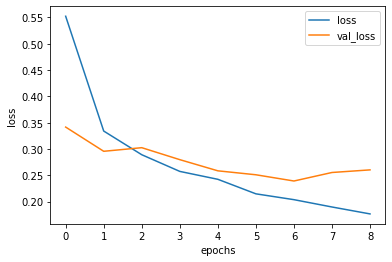

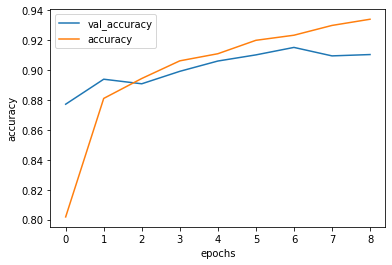

In [24]:
model_2_training.history.keys()
pd.DataFrame(model_2_training.history)[['loss', 'val_loss']].plot()
plt.xlabel('epochs')
plt.ylabel('loss')

#
pd.DataFrame(model_2_training.history)[['val_accuracy', 'accuracy']].plot()
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [25]:
# predications
pred = model_2.predict(X_test_image)

In [20]:
# come back to this
#test=plt.imshow(X_test[8].reshape(28,28),cmap='gray')
#cv2.putText(test, 'my text')

True label on-hot-encoded: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
predicted label on-hot-encoded: [6.23112239e-13 4.58656134e-11 2.44084783e-15 6.40426450e-15
 1.98454114e-13 1.00000000e+00 1.34610976e-14 8.14270817e-10
 1.04076958e-12 7.60348784e-10]


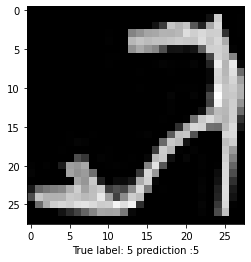

In [21]:
test=plt.imshow(X_test_image[8].reshape(28,28),cmap='gray')
plt.xlabel('True label: ' +str(y_test[8].argmax())+ ' prediction :'+ str(pred[8].argmax()))
print('True label on-hot-encoded:',y_test[8])
print('predicted label on-hot-encoded:',pred[8])

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'T-shirt/top'),
  Text(1, 0, 'Trouser'),
  Text(2, 0, 'Pullover'),
  Text(3, 0, 'Dress'),
  Text(4, 0, 'Coat'),
  Text(5, 0, 'Sandal'),
  Text(6, 0, 'Shirt'),
  Text(7, 0, 'Sneaker'),
  Text(8, 0, 'Bag'),
  Text(9, 0, 'Ankle Boot')])

<Figure size 720x720 with 0 Axes>

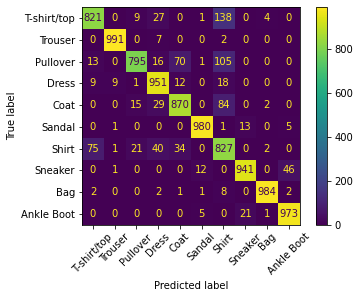

In [22]:
ax =plt.figure(figsize = (10,10))
cm = confusion_matrix(y_true=y_test_copy, y_pred=np.argmax(pred, axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels.values())

disp.plot()                                 # change the size of the matrix
plt.xticks(rotation=45)


In [23]:
# save first model
model_2.save('models/conv_dense_self_trained_layer.h5')